In [17]:
%matplotlib inline

import numpy as np
import os
import matplotlib as mpl


# for dirname, dirnames, filenames in os.walk('.'):
#     # print path to all subdirectories first.
#     for subdirname in dirnames:
#         print(os.path.join(dirname, subdirname))

#     # print path to all filenames.
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

################################################################################


#Find file and folder names in a directory and turn into a string array
files = []
folders = []

for (path, dirnames, filenames) in os.walk('.'):
    folders.extend(os.path.join(path, name) for name in dirnames)
    files.extend(os.path.join(path, name) for name in filenames)

#print(files[1:5][0:4])


################################################################################


#Open text file and convert into arrays B and D
f=open("./cs231n_data/break_frame48076_dropid2649_x106_y74.txt")

txtread=f.read().split()
for i in range(0,len(txtread)): 
    txtread[i]=txtread[i].split(' ')

A=np.array(txtread)
r,c = A.shape
B=A[0:8]
C=A[8:r]



n=0
r,c = C.shape
D=np.zeros((len(C)//2,2))

# print(r)

for i in range(r):
#     print(n)
    if i%2 == 0:
        D[n,0]=C[i]
    elif i%2 == 1:
        D[n,1]=C[i]
        n=n+1

print(' ')
print(B)
print(' ')
print(D)
print(' ')
print(D.shape)

 
[['1.000000']
 ['2649.000000']
 ['105.601220']
 ['73.592683']
 ['1640.000000']
 ['250.694000']
 ['139.180984']
 ['21.910114']]
 
[[-47. -27.]
 [-48. -26.]
 [-49. -25.]
 [-50. -24.]
 [-50. -23.]
 [-51. -22.]
 [-51. -21.]
 [-51. -20.]
 [-51. -19.]
 [-50. -18.]
 [-50. -17.]
 [-50. -16.]
 [-49. -15.]
 [-49. -14.]
 [-48. -13.]
 [-48. -12.]
 [-47. -11.]
 [-46. -10.]
 [-46.  -9.]
 [-45.  -8.]
 [-45.  -7.]
 [-44.  -6.]
 [-43.  -5.]
 [-43.  -4.]
 [-42.  -3.]
 [-41.  -2.]
 [-40.  -1.]
 [-39.   0.]
 [-38.   1.]
 [-37.   1.]
 [-36.   2.]
 [-35.   2.]
 [-34.   2.]
 [-33.   2.]
 [-32.   2.]
 [-31.   3.]
 [-30.   3.]
 [-29.   3.]
 [-28.   3.]
 [-27.   3.]
 [-26.   3.]
 [-25.   3.]
 [-24.   3.]
 [-23.   3.]
 [-22.   3.]
 [-21.   3.]
 [-20.   3.]
 [-19.   3.]
 [-18.   3.]
 [-17.   3.]
 [-16.   3.]
 [-15.   3.]
 [-14.   3.]
 [-13.   3.]
 [-12.   3.]
 [-11.   3.]
 [-10.   3.]
 [ -9.   3.]
 [ -8.   3.]
 [ -7.   3.]
 [ -6.   3.]
 [ -5.   3.]
 [ -4.   3.]
 [ -3.   3.]
 [ -2.   4.]
 [ -1.   4.]
 [  0.   4.

95


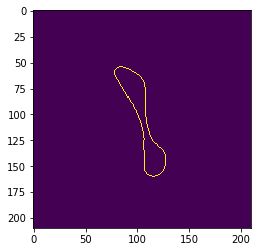

In [3]:
dim = 95
print(dim)
from matplotlib import pyplot as plt
size = int(2*dim+20)
im = np.zeros((size,size))
inds = np.array(D.astype(int)+int(dim)+10)
im[inds[:,0],inds[:,1]]=1

plt.imshow(im)
plt.show()


In [4]:
def imagify(D, dim):
    size = int(2*dim+20)
    im = np.zeros((size,size))
    inds = np.array(D.astype(int)+dim+10)
    im[inds[:,0],inds[:,1]]=1
    return im

In [5]:
def load_data():
    files = []
    folders = []
    for (path, dirnames, filenames) in os.walk('./cs231n_data_2'):
        folders.extend(os.path.join(path, name) for name in dirnames)
        files.extend(os.path.join(path, name) for name in filenames)
    
    names = []
    max_dim = 0
    
    for f in files:
        label = f.replace('./cs231n_data_2/', "", 1)
        parts = label.split("_")
        if parts[0] == "nobreak" or parts[0] == "break":
            names.append(f)
    
    n = len(names)
    X = np.zeros((n,210,210))
    y = np.zeros(n)
    feats = np.zeros((n,8))
    Dees = []
    
    for j,name in enumerate(names):
        f=open(name)
        if "nobreak" in name: #frame was a nobreak
            y[j] = 1.0
        else:
            y[j] = 0.0 
            
        txtread=f.read().split()
        for i in range(0,len(txtread)): 
            txtread[i]=txtread[i].split(' ')

        A=np.array(txtread)
        r,c = A.shape
        B=A[0:8]
        feats[j] = B.flatten()
        
        C=A[8:r]
        
        n=0
        r,c = C.shape
        D=np.zeros((len(C)//2,2))
        for i in range(r):
            if i%2 == 0:
                D[n,0]=C[i]
            elif i%2 == 1:
                D[n,1]=C[i]
                n=n+1
#         a = abs(np.amin(D))
#         b = np.amax(D)
#         max_dim = max(a,b,max_dim)
#         Dees.append(D)
        f.close()
        X[j] = imagify(D, 95)
        if j%50000 == 0:
            print(j)
#     print(max_dim)
    return X,y,feats

In [6]:
X,y,feats = load_data()

0
50000
100000
150000


In [4]:
from matplotlib import pyplot as plt

print(X.shape)

Xt = np.swapaxes(X,1,2)

for im in Xt[::5000]:
    plt.imshow(im)
    plt.show()


NameError: name 'X' is not defined

In [8]:
n = len(X)
print(n)
print(X.shape)


191748
(191748, 210, 210)


178023
13725
0.9284216784529695


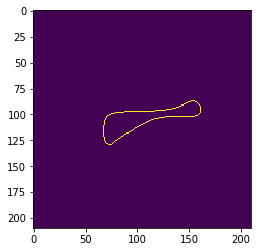

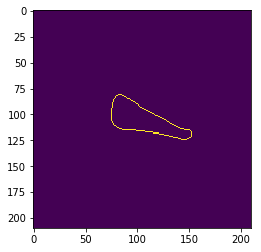

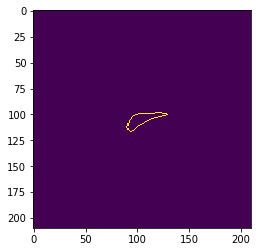

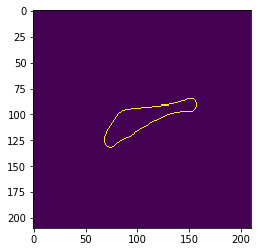

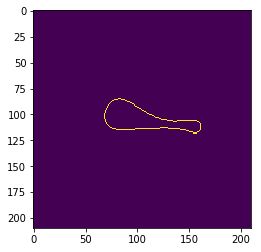

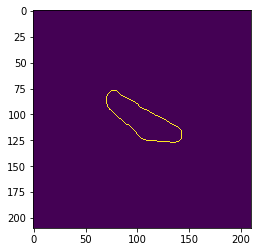

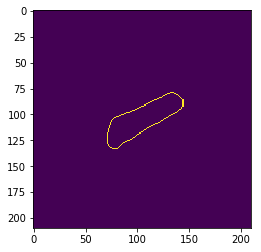

In [16]:
ind_1 = np.nonzero(y)
print(len(ind_1[0]))
ind_0 = np.nonzero(y-1)
print(len(ind_0[0]))
print(np.mean(y))

for im in Xt[ind_0][::2000]:
    plt.imshow(im)
    plt.show()

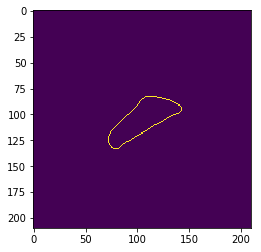

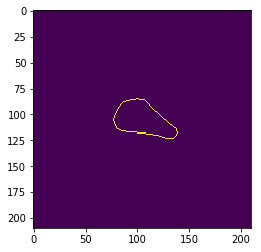

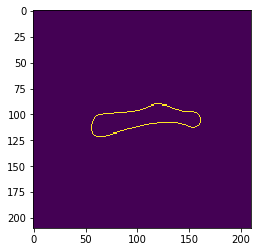

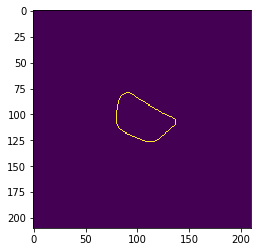

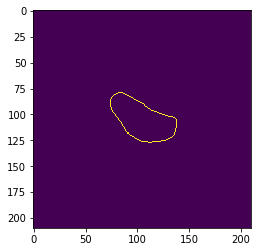

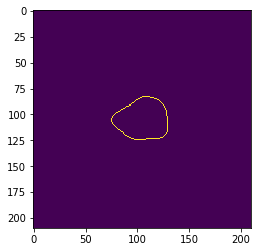

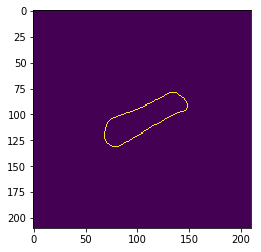

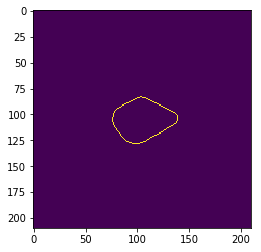

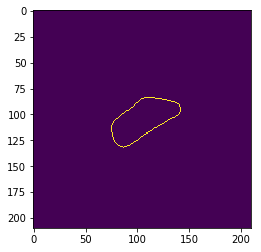

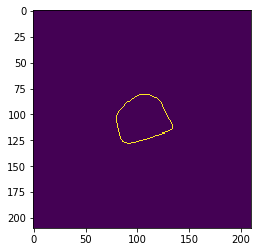

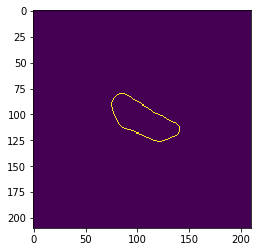

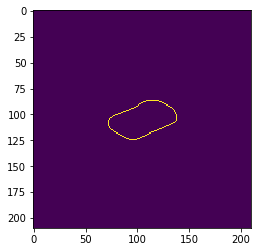

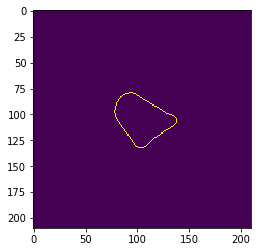

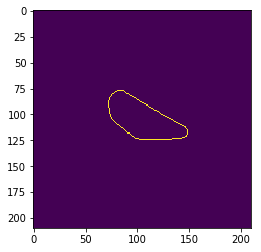

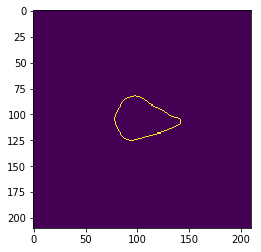

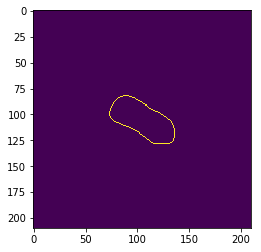

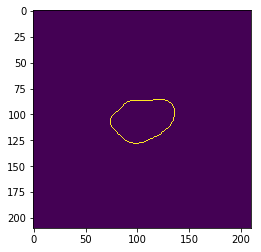

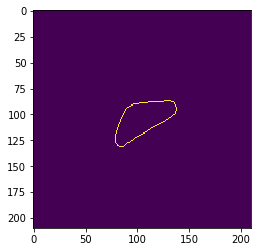

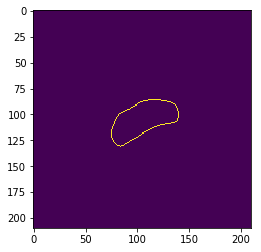

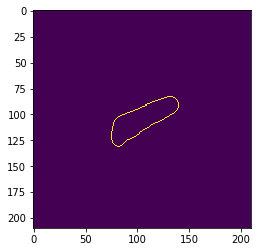

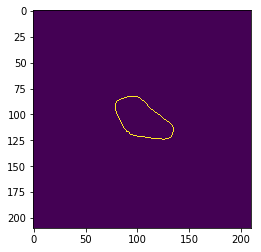

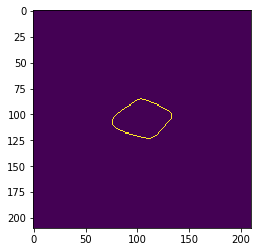

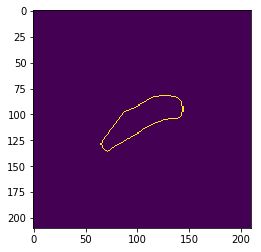

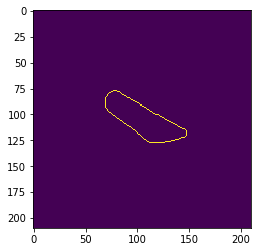

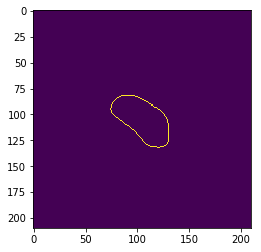

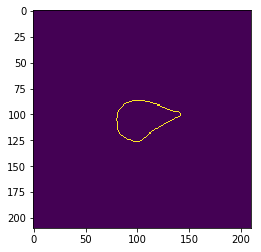

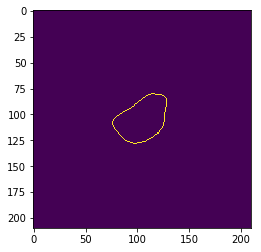

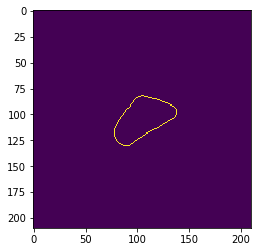

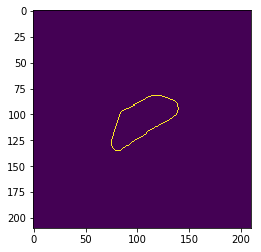

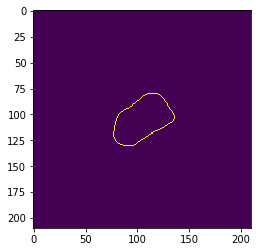

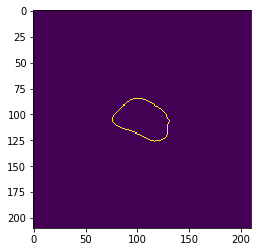

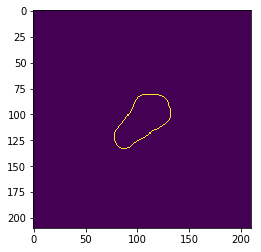

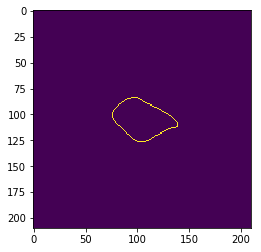

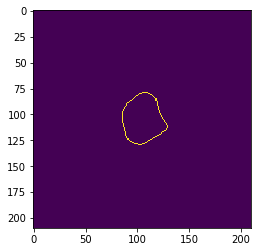

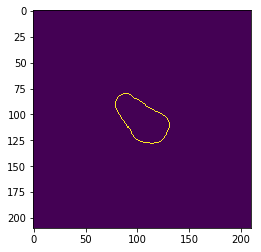

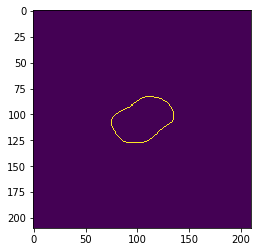

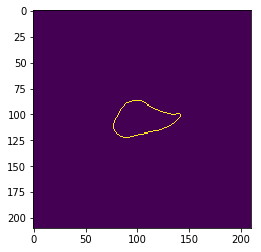

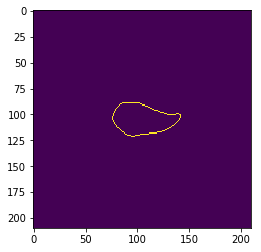

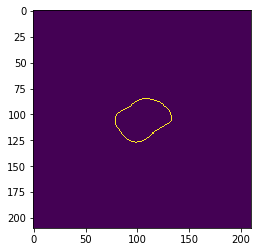

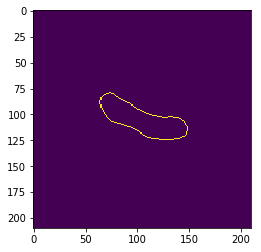

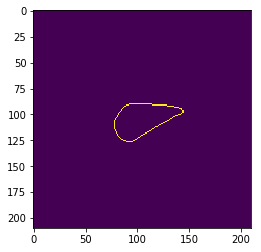

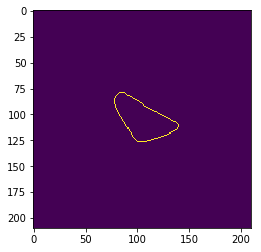

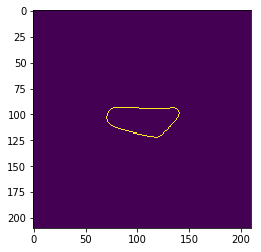

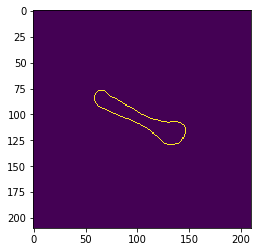

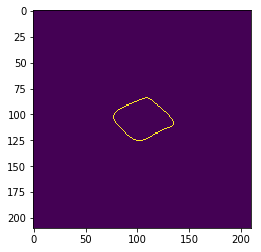

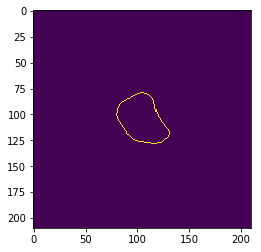

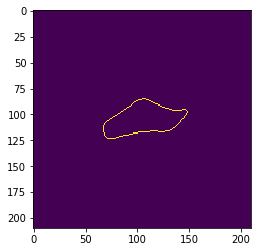

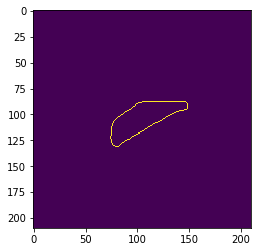

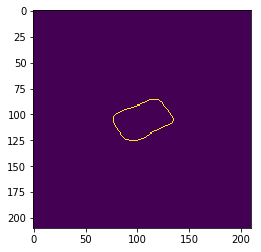

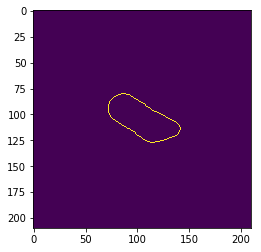

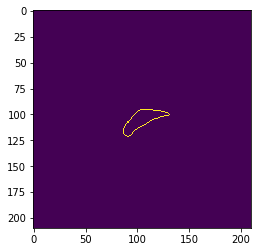

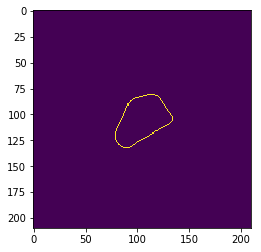

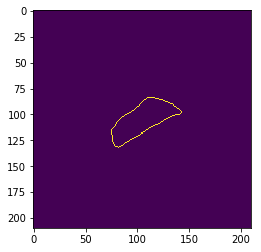

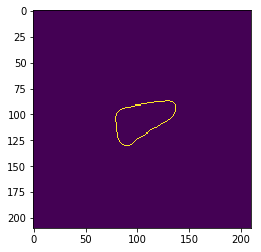

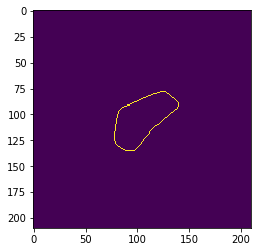

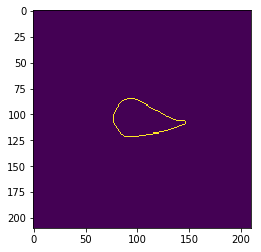

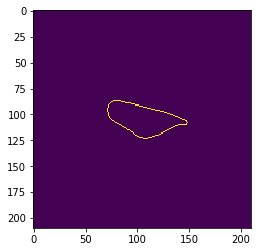

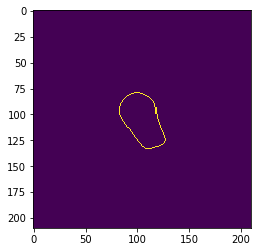

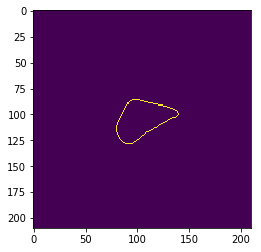

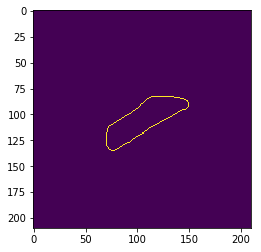

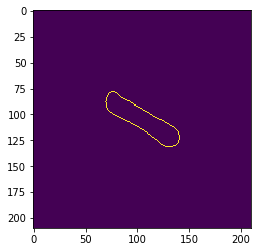

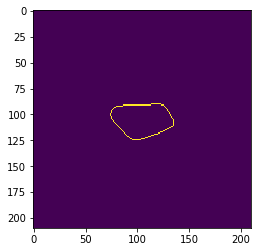

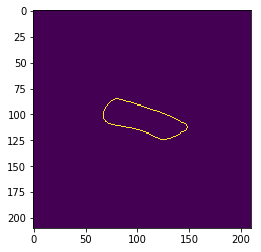

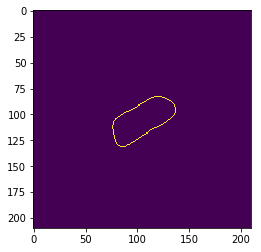

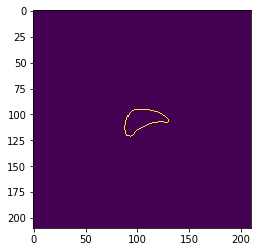

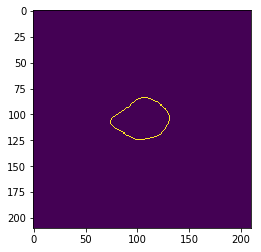

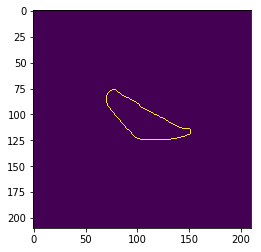

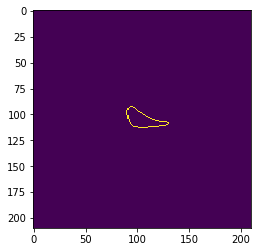

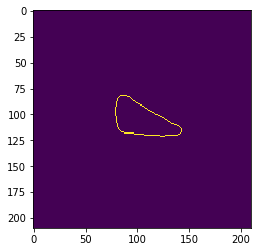

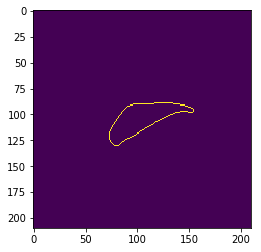

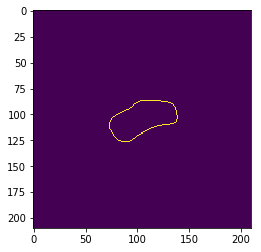

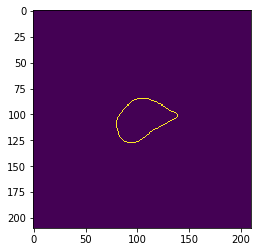

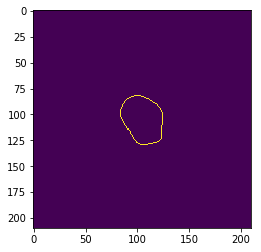

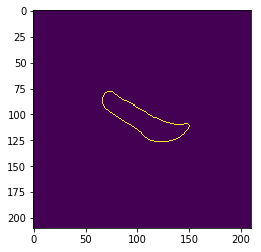

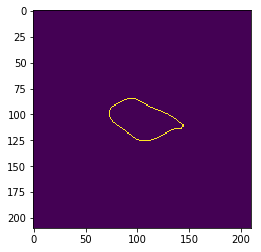

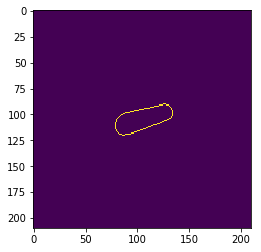

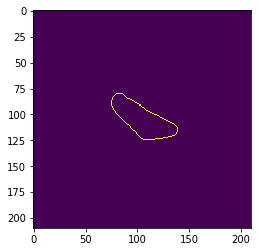

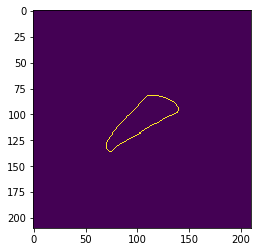

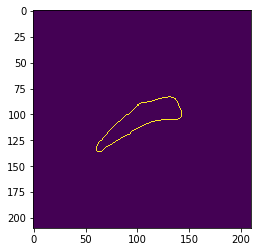

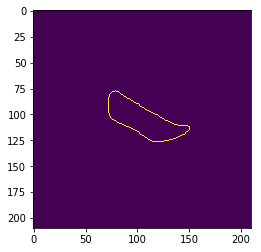

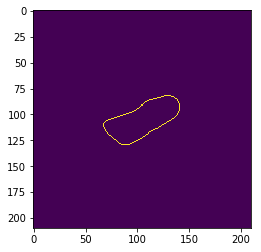

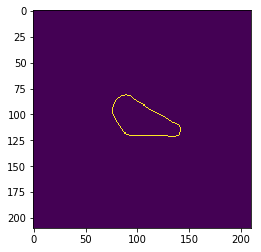

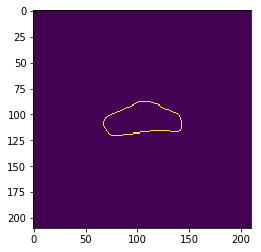

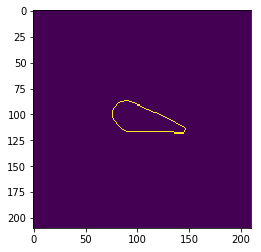

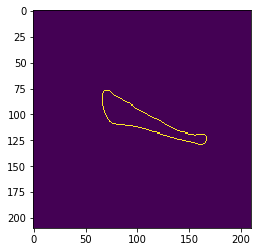

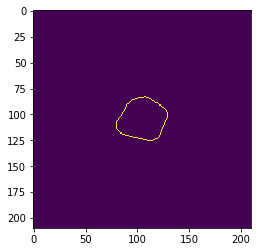

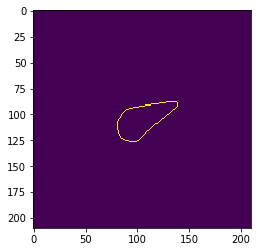

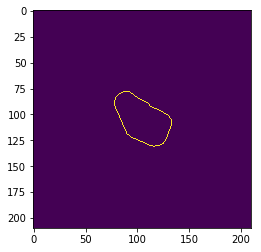

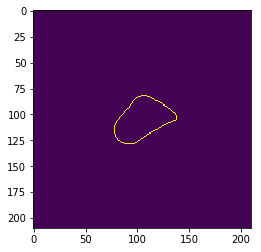

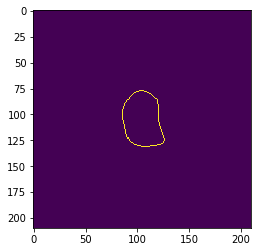

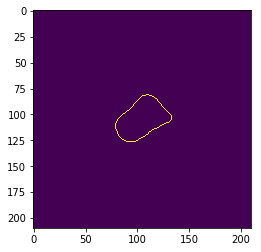

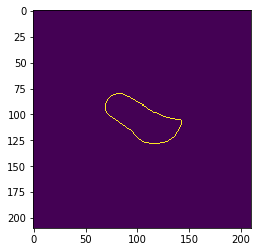

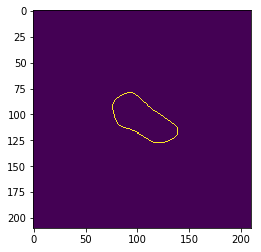

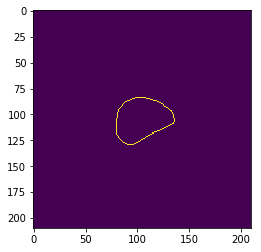

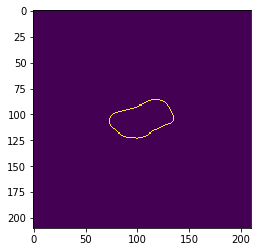

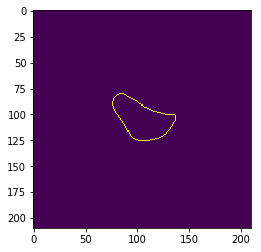

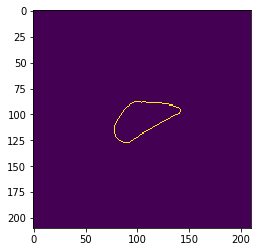

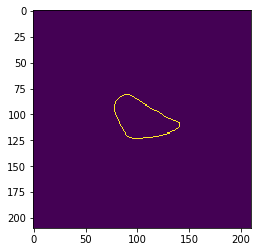

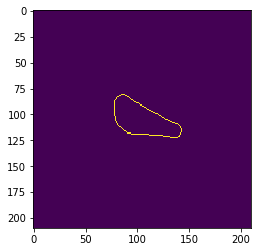

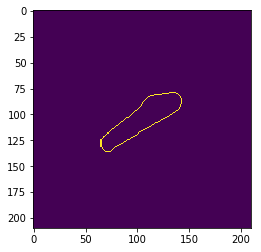

In [24]:
t = (ind_1[0][0:100],)
for im in Xt[t]:
    plt.imshow(im)
    plt.show()


In [29]:
prams = feats[:,-4:]

In [34]:
preds = np.zeros_like(y)
for i, drop in enumerate(prams):
    a,p,ma,mi = drop
    if ((p**2)/(4*np.pi*a)) > 1.7:
        preds[i] = 0
    else:
        preds[i] = 1
        
acc = np.mean(1-np.absolute(preds-y))
print("accuracy: {}".format(acc))
    

accuracy: 0.832524980704


In [35]:
# experiments:  1. classify with two layer net (conv)
#               2. classify with existing formula (83%)
#               3. run (conv/van) autoencoder and visualize reconstructed images
#               4. modify data set for either balance in classes or "grey zone", or symmetry
        
    

In [41]:
x_int = X.astype(np.int16)
y_int = y.astype(np.int16)
np.savez_compressed("np_data", ims=x_int,classes=y_int, f=feats)

In [18]:

x_int = None
y_int = None
new_feat = None

with np.load('np_data.npz') as data:
    x_int = data['ims']
    y_int = data['classes']
    new_feat = data['f']


In [19]:
x = x_int.astype(np.float32)
y = y_int

In [20]:
i1 = np.nonzero(y)
print(len(i1[0]))
i0 = np.nonzero(y-1)
print(len(i0[0]))

178023
13725


In [21]:
#creat balanced data_set

breaks = i0[0][:5000]
nobreaks = i1[0][:5000]

bal_inds = np.concatenate((breaks,nobreaks))
bal_inds = (bal_inds,)

bal_x = x[bal_inds]
print(bal_x.shape)
bal_y = y[bal_inds]
print(bal_y.shape)
feat_bal = new_feat[bal_inds]

(10000, 210, 210)
(10000,)


In [22]:
#predict droplet breakage based on balanced dataset

prams = feat_bal[:,-4:]

preds_pa = np.zeros_like(bal_y)
preds_elong = np.zeros_like(bal_y)
preds_deform = np.zeros_like(bal_y)

for i, drop in enumerate(prams):
    a,p,ma,mi = drop
    if ((p**2)/(4*np.pi*a)) > 1.7:
        preds_pa[i] = 0
    else:
        preds_pa[i] = 1
        
    if ma/mi > 4:
        preds_elong[i] = 0
    else:
        preds_elong[i] = 1
        
    if (ma-mi)/(ma+mi) > 0.66:
        preds_deform[i] = 0
    else:
        preds_deform[i] = 1
        
acc_pa = np.mean(1-np.absolute(preds_pa-bal_y))
acc_elong = np.mean(1-np.absolute(preds_elong-bal_y))
acc_deform = np.mean(1-np.absolute(preds_deform-bal_y))
print("accuracy pa: {}".format(acc_pa))
print("accuracy elong: {}".format(acc_elong))
print("accuracy deform: {}".format(acc_deform))

accuracy pa: 0.5809
accuracy elong: 0.5641
accuracy deform: 0.5423


In [26]:
#save balanced dataset

x_bal_int = bal_x.astype(np.int16)
y_bal_int = bal_y.astype(np.int16)

print(x_bal_int.shape[0],y_bal_int.shape[0])
print(np.mean(y_bal_int))

np.savez_compressed("np_data_balanced", ims=x_bal_int,classes=y_bal_int, f=feat_bal)

10000 10000
0.5


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torch.utils.data import Dataset

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

In [28]:
USE_GPU = False

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cpu


In [29]:
class DropDataset(Dataset):
    """Droplet dataset."""

    def __init__(self, npz_filename, root_dir="", transform=None):
        """
        Args:
            npz_filename (string): Path to the npz file with data.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        x = None
        y = None
        self.new_feat = None

        with np.load(npz_filename) as data:
            x = data['ims']
            y = data['classes']
            self.new_feat = data['f']
        x = x.astype(np.float32)
        y = y.astype(np.float32)
        #shuffle datasets
        p = np.random.permutation(len(x))
        x = x[p]
        y = y[p]
        self.x = torch.from_numpy(x).unsqueeze_(1)
        self.y = torch.from_numpy(y)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        image = self.x[idx]
        label = self.y[idx]
        sample = {'image': image, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [30]:
NUM_TRAIN = 8000

# We set up a Dataset object for each split (train / val / test); Datasets load
# training examples one at a time, so we wrap each Dataset in a DataLoader which
# iterates through the Dataset and forms minibatches. We divide the CIFAR-10
# training set into train and val sets by passing a Sampler object to the
# DataLoader telling how it should sample from the underlying Dataset.
drop_set = DropDataset('np_data_balanced.npz')

print("loaded dataset")

loader_train = DataLoader(drop_set, batch_size=64, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

loader_val = DataLoader(drop_set, batch_size=64, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 10000)))

print("split dataset")

print(torch.__version__)

loaded dataset
split dataset
0.4.0


In [31]:
def check_accuracy_part34(loader, model):
#     if loader.dataset.train:
#         print('Checking accuracy on validation set')
#     else:
#         print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for sample in loader:
            # sample form: {'image': image, 'label': label}
            x = sample['image']
            y = sample['label']
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

In [83]:
def train_part34(model, optimizer, epochs=1):
    """
    Train a model on Drop dataset using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, sample in enumerate(loader_train):
            model.train()  # put model to training mode
            x = sample['image']
            y = sample['label']
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            # loss = F.cross_entropy(scores, y)
            loss = F.mse_loss(scores,x)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()
            
            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                #check_accuracy_part34(loader_val, model)
                print()

In [33]:
def flatten(x):
    N = x.shape[0] # read in N, C, H, W
    return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

In [34]:
class Flatten(nn.Module):
    def forward(self, x):
        return flatten(x)

In [40]:
channel_1 = 16
channel_2 = 8
learning_rate = 1e-2

model = None
optimizer = None

################################################################################
# TODO: Rewrite the 2-layer ConvNet with bias from Part III with the           #
# Sequential API.                                                              #
################################################################################
#         self.c2d_1 = nn.Conv2d(in_channel, channel_1, kernel_size=5, stride=1, padding=2)
#         self.c2d_2 = nn.Conv2d(channel_1, channel_2, kernel_size=3, stride=1, padding=1)
#         self.c2d_fc1 = nn.Linear(32*32*channel_2, num_classes)


model = nn.Sequential(
    nn.Conv2d(1, channel_1, kernel_size=5, stride=1, padding=2),
    nn.ReLU(),
    nn.Conv2d(channel_1, channel_2, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    Flatten(),
    nn.Linear((210//2)*(210//2)*channel_2, 2)
)

# you can use Nesterov momentum in optim.SGD
optimizer = optim.SGD(model.parameters(), lr=learning_rate,
                     momentum=0.9, nesterov=True)
################################################################################
#                                 END OF YOUR CODE                             
################################################################################

train_part34(model, optimizer)

Iteration 0, loss = 0.6951
Got 1002 / 2000 correct (50.10)

Iteration 100, loss = 0.6102
Got 1310 / 2000 correct (65.50)



In [39]:
run = 0.0
for t, sample in enumerate(drop_set):
    y = sample['label']
    run += torch.sum(y)
    
print(run)
print(run/(t+1))

tensor(5000.)
tensor(0.5000)


In [42]:
check_accuracy_part34(loader_val, model)

Got 1350 / 2000 correct (67.50)


In [84]:
#autoencoder time!

class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 16, 5, stride=1, padding=2)  
        self.r1 = nn.ReLU(True)
        self.p1 = nn.MaxPool2d(2,return_indices=True)
        self.c2 = nn.Conv2d(16, 8, 3, stride=1, padding=1) 
        self.r2 = nn.ReLU(True) 

        self.uc2 = nn.ConvTranspose2d(8, 16, 3, stride=1, padding=1) 
        self.r3 = nn.ReLU(True)
        self.u1 = nn.MaxUnpool2d(2)
        self.r4 = nn.ReLU(True)
        self.uc1 = nn.ConvTranspose2d(16, 1, 5, stride=1, padding=2)   
        self.t1 = nn.Tanh()

    def forward(self, x):
        x = self.c1(x)
        x = self.r1(x)
        x,ind = self.p1(x)
        x = self.c2(x)
        c = self.r2(x)
        y = self.uc2(c)
        y = self.r3(y)
        y = self.u1(y,ind)
        y = self.r4(y)
        y = self.uc1(y)
        y = self.t1(y)
        return y

In [85]:
model_1 = autoencoder()
optimizer_1 = torch.optim.Adam(model.parameters())

train_part34(model_1, optimizer_1)

Iteration 0, loss = 0.0075

Iteration 100, loss = 0.0074



KeyboardInterrupt: 